<a href="https://colab.research.google.com/github/wakandamohan1/Python-Powered-Analysis-of-Olist-s-Brazilian-E-Commerce-Stores/blob/main/olist_24_april_updated_code_gdrive_mount.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


 # Brazilian E-Commerce Olist Store Performance Analytics with Python 🛒📊


## Importing Required Libraries  

In [1]:
# pandas: Used for data manipulation and analysis. It provides data structures like Series and DataFrame.
import pandas as pd

# numpy: Provides support for large multi-dimensional arrays and matrices, along with mathematical functions.
import numpy as np

# matplotlib.pyplot: A plotting library used for creating static, animated, and interactive visualizations.
import matplotlib.pyplot as plt

# seaborn: Built on top of matplotlib, it provides a high-level interface for attractive and informative statistical graphics.
import seaborn as sns


## ETL: Extract, Transform, Load 🔄

<div style="color:Black; font-size:22px;">
    <b>Loading and Exploring the Dataset 📂</b>
</div>



### Add the folder to your Google Drive using this link, then update the folder path in your code accordingly to proceed.

##LINK : https://drive.google.com/drive/folders/10E8Nsl6wVkFBCbKcz8cQP1dO3mmYpunI?usp=drive_link


In [2]:
# STEP 1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 📌 STEP 2: Set the folder path to the shared folder (after adding it to your Drive)


# 👇 You must add this folder to your Drive manually from this link also clickable in the text box above :
# 👉 https://drive.google.com/drive/folders/10E8Nsl6wVkFBCbKcz8cQP1dO3mmYpunI?usp=drive_link

# 📁 After adding, he should rename or locate it under 'My Drive'

#update the folder path accordingly below !!

folder_path = "/content/drive/MyDrive/DATA_ANALYTICS_ASHWIN/PROJECTS/E-COMMERCE PROJECT/dataset/"  ## update here " " !!!

# 📌 STEP 3: Load all CSV files
import pandas as pd

orders       = pd.read_csv(folder_path + "olist_orders_dataset_6.csv")
order_items  = pd.read_csv(folder_path + "olist_order_items_dataset_3.csv")
customers    = pd.read_csv(folder_path + "olist_customers_dataset_1.csv")
products     = pd.read_csv(folder_path + "olist_products_dataset_7.csv")
payments     = pd.read_csv(folder_path + "olist_order_payments_dataset_4.csv")
reviews      = pd.read_csv(folder_path + "olist_order_reviews_dataset_5.csv")
sellers      = pd.read_csv(folder_path + "olist_sellers_dataset_8.csv")
geolocation  = pd.read_csv(folder_path + "olist_geolocation_dataset_2.csv")
translation  = pd.read_csv(folder_path + "product_category_name_translation_9.csv")

# 📌 STEP 4: Sanity check - print shape of each DataFrame
print("✅ Files Loaded:")
print("orders:", orders.shape)
print("order_items:", order_items.shape)
print("customers:", customers.shape)
print("products:", products.shape)
print("payments:", payments.shape)
print("reviews:", reviews.shape)
print("sellers:", sellers.shape)
print("geolocation:", geolocation.shape)
print("translation:", translation.shape)

✅ Files Loaded:
orders: (99441, 8)
order_items: (112650, 7)
customers: (99441, 5)
products: (32951, 9)
payments: (103886, 5)
reviews: (99224, 7)
sellers: (3095, 4)
geolocation: (1000163, 5)
translation: (71, 2)


In [4]:
dataframes = {
    "orders": orders,
    "order_items": order_items,
    "customers": customers,
    "products": products,
    "payments": payments,
    "reviews": reviews,
    "sellers": sellers,
    "geolocation": geolocation,
    "translation": translation
}

for name, df in dataframes.items():
    print(f"📄 --- {name.upper()} ---")
    display(df.head())

📄 --- ORDERS ---


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


📄 --- ORDER_ITEMS ---


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


📄 --- CUSTOMERS ---


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


📄 --- PRODUCTS ---


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


📄 --- PAYMENTS ---


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


📄 --- REVIEWS ---


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


📄 --- SELLERS ---


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


📄 --- GEOLOCATION ---


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


📄 --- TRANSLATION ---


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [5]:
dataframes = {
    "orders": orders,
    "order_items": order_items,
    "customers": customers,
    "products": products,
    "payments": payments,
    "reviews": reviews,
    "sellers": sellers,
    "geolocation": geolocation,
    "translation": translation
}

for name, df in dataframes.items():
    print(f"📄 --- {name.upper()} ---")
    display(df.tail())

📄 --- ORDERS ---


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
99440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00


📄 --- ORDER_ITEMS ---


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72
112649,fffe41c64501cc87c801fd61db3f6244,1,350688d9dc1e75ff97be326363655e01,f7ccf836d21b2fb1de37564105216cc1,2018-06-12 17:10:13,43.00,12.79


📄 --- CUSTOMERS ---


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS
99440,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP


📄 --- PRODUCTS ---


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0
32950,106392145fca363410d287a815be6de4,cama_mesa_banho,58.0,309.0,1.0,2083.0,12.0,2.0,7.0


📄 --- PAYMENTS ---


,order_id,payment_sequential,payment_type,payment_installments,payment_value
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54
103885,28bbae6599b09d39ca406b747b6632b1,1,boleto,1,191.58


📄 --- REVIEWS ---


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,NaN,"meu produto chegou e ja tenho que devolver, po...",2017-07-03 00:00:00,2017-07-03 21:01:49


📄 --- SELLERS ---


,seller_id,seller_zip_code_prefix,seller_city,seller_state
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS
3094,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP


📄 --- GEOLOCATION ---


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS
1000162,99950,-28.070104,-52.018658,tapejara,RS


📄 --- TRANSLATION ---


,product_category_name,product_category_name_english
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
70,seguros_e_servicos,security_and_services


## Data Cleaning and Transformation 🛠️📊

### Handling Missing Data: Filling or Dropping Nulls


In [6]:
len(orders) # # Get the total number of records (rows) in the orders DataFrame

99441

In [7]:
orders.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


#### 📊 Null Count Summary

**Column** | **Nulls** | **What it Means**
--- | --- | ---
`order_purchase_timestamp` | 0 | ✅ Always present — it’s the order placed time.
`order_approved_at` | 160 | ⚠️ May not have been approved (possibly canceled/failed).
`order_delivered_carrier_date` | 1,783 | ⚠️ Not handed over to carrier — canceled or processing.
`order_delivered_customer_date` | 2,965 | ⚠️ Not delivered — possibly canceled or returned.
`order_estimated_delivery_date` | 0 | ✅ Always available — system-generated prediction.

In [8]:
orders.dtypes

,0
order_id,object
customer_id,object
order_status,object
order_purchase_timestamp,object
order_approved_at,object
order_delivered_carrier_date,object
order_delivered_customer_date,object
order_estimated_delivery_date,object


## Data Type Conversions: Ensuring Consistency 🔄

In [9]:
# Convert each date column to datetime format, handling any invalid or missing data by coercing them to NaT (Not a Time)

orders["order_delivered_carrier_date"] = pd.to_datetime(orders["order_delivered_carrier_date"], errors="coerce")

# 'order_delivered_carrier_date' column is being converted to datetime format.
# If any value cannot be converted, it will become NaT (Not a Time), indicating invalid or missing data.

orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"], errors="coerce")

# Similarly, 'order_delivered_customer_date' is converted to datetime.
# Invalid data (e.g., non-date strings or missing values) will become NaT.

orders["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"], errors="coerce")

# The 'order_estimated_delivery_date' is also converted to datetime, with any invalid or missing entries coerced to NaT.

orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"], errors="coerce")

# 'order_purchase_timestamp' is converted to datetime, ensuring that any invalid formats are replaced with NaT.

orders["order_approved_at"] = pd.to_datetime(orders["order_approved_at"], errors="coerce")

# Finally, 'order_approved_at' is also converted to datetime, handling invalid data in the same way.



In [10]:
# Check the first few entries of the date columns to verify the format

print(orders['order_delivered_carrier_date'].head())
print(orders['order_delivered_customer_date'].head())
print(orders['order_estimated_delivery_date'].head())
print(orders['order_purchase_timestamp'].head())
print(orders['order_approved_at'].head())

0   2017-10-04 19:55:00
1   2018-07-26 14:31:00
2   2018-08-08 13:50:00
3   2017-11-22 13:39:59
4   2018-02-14 19:46:34
Name: order_delivered_carrier_date, dtype: datetime64[ns]
0   2017-10-10 21:25:13
1   2018-08-07 15:27:45
2   2018-08-17 18:06:29
3   2017-12-02 00:28:42
4   2018-02-16 18:17:02
Name: order_delivered_customer_date, dtype: datetime64[ns]
0   2017-10-18
1   2018-08-13
2   2018-09-04
3   2017-12-15
4   2018-02-26
Name: order_estimated_delivery_date, dtype: datetime64[ns]
0   2017-10-02 10:56:33
1   2018-07-24 20:41:37
2   2018-08-08 08:38:49
3   2017-11-18 19:28:06
4   2018-02-13 21:18:39
Name: order_purchase_timestamp, dtype: datetime64[ns]
0   2017-10-02 11:07:15
1   2018-07-26 03:24:27
2   2018-08-08 08:55:23
3   2017-11-18 19:45:59
4   2018-02-13 22:20:29
Name: order_approved_at, dtype: datetime64[ns]


In [11]:
# Verify the date columns

display(orders[['order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date',
              'order_purchase_timestamp', 'order_approved_at']])

,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_timestamp,order_approved_at
0,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-02 10:56:33,2017-10-02 11:07:15
1,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-24 20:41:37,2018-07-26 03:24:27
2,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-08 08:38:49,2018-08-08 08:55:23
3,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-18 19:28:06,2017-11-18 19:45:59
4,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-13 21:18:39,2018-02-13 22:20:29
...,...,...,...,...,...
99436,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017-03-09 09:54:05,2017-03-09 09:54:05
99437,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018-02-06 12:58:58,2018-02-06 13:10:37
99438,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017-08-27 14:46:43,2017-08-27 15:04:16
99439,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018-01-08 21:28:27,2018-01-08 21:36:21


In [12]:
# Fill missing 'order_approved_at' with 'order_purchase_timestamp' without changing type
orders["order_approved_at"] = orders["order_approved_at"].fillna(orders["order_purchase_timestamp"])

# Fill missing 'order_delivered_carrier_date' and 'order_delivered_customer_date' with NaT (Not a Time) to maintain datetime format
orders["order_delivered_carrier_date"] = orders["order_delivered_carrier_date"].fillna(pd.NaT)
orders["order_delivered_customer_date"] = orders["order_delivered_customer_date"].fillna(pd.NaT)



In [13]:
orders.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [14]:
# Check for invalid date formats or missing values
invalid_dates_carrier = orders[orders['order_delivered_carrier_date'].isna()]
invalid_dates_customer = orders[orders['order_delivered_customer_date'].isna()]
invalid_dates_estimated = orders[orders['order_estimated_delivery_date'].isna()]

# Check if there are any "Not Delivered" values that are still strings
not_delivered_carrier = orders[orders['order_delivered_carrier_date'] == "Not Delivered"]
not_delivered_customer = orders[orders['order_delivered_customer_date'] == "Not Delivered"]

# Display results to check for any issues
print(f"Invalid 'order_delivered_carrier_date': {invalid_dates_carrier.shape[0]} rows")
print(f"Invalid 'order_delivered_customer_date': {invalid_dates_customer.shape[0]} rows")
print(f"Invalid 'order_estimated_delivery_date': {invalid_dates_estimated.shape[0]} rows")


Invalid 'order_delivered_carrier_date': 1783 rows
Invalid 'order_delivered_customer_date': 2965 rows
Invalid 'order_estimated_delivery_date': 0 rows


In [15]:
orders.dtypes

,0
order_id,object
customer_id,object
order_status,object
order_purchase_timestamp,datetime64[ns]
order_approved_at,datetime64[ns]
order_delivered_carrier_date,datetime64[ns]
order_delivered_customer_date,datetime64[ns]
order_estimated_delivery_date,datetime64[ns]


In [16]:
order_items.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [17]:
order_items.dtypes

,0
order_id,object
order_item_id,int64
product_id,object
seller_id,object
shipping_limit_date,object
price,float64
freight_value,float64


In [18]:
# Convert shipping_limit_date to datetime
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"])

order_items.dtypes


,0
order_id,object
order_item_id,int64
product_id,object
seller_id,object
shipping_limit_date,datetime64[ns]
price,float64
freight_value,float64


In [19]:
products.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [20]:
products.dtypes

,0
product_id,object
product_category_name,object
product_name_lenght,float64
product_description_lenght,float64
product_photos_qty,float64
product_weight_g,float64
product_length_cm,float64
product_height_cm,float64
product_width_cm,float64


In [21]:
customers.isnull().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [22]:
customers.dtypes

,0
customer_id,object
customer_unique_id,object
customer_zip_code_prefix,int64
customer_city,object
customer_state,object


In [23]:
# Convert customer_zip_code_prefix to string because zip codes are identifiers, not numerical values.
# Treating them as strings ensures they are handled correctly in merges, groupings, and visualizations.
# This preserves leading zeros and maintains consistency when used as categorical/location data.

customers["customer_zip_code_prefix"] = customers["customer_zip_code_prefix"].astype(str)


In [24]:
payments.isnull().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [25]:
payments.dtypes

,0
order_id,object
payment_sequential,int64
payment_type,object
payment_installments,int64
payment_value,float64


In [26]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [27]:
reviews.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [28]:
reviews.dtypes

,0
review_id,object
order_id,object
review_score,int64
review_comment_title,object
review_comment_message,object
review_creation_date,object
review_answer_timestamp,object


In [29]:
# Convert review_score to float for better precision in analytics
# Converting to float allows for precise average calculations and avoids integer rounding,
# especially useful for visualizations and aggregations like mean review scores (e.g., 4.5 stars).

reviews['review_score'] = reviews['review_score'].astype(float)


In [30]:
sellers.isnull().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [31]:
sellers.dtypes

,0
seller_id,object
seller_zip_code_prefix,int64
seller_city,object
seller_state,object


In [32]:
# Convert seller_zip_code_prefix to string for consistent formatting and readability
sellers['seller_zip_code_prefix'] = sellers['seller_zip_code_prefix'].astype(str)

# Converting to string ensures proper formatting during grouping, merging, or visualizing.
# Zip codes are identifiers, not numerical values for calculation.

#ANALYSIS BEFORE MERGING

## Merging Datasets: Unifying Data for Deeper Insights 🔄📊

### Understanding How Different Datasets Connect 🔗

In [33]:
df=orders.merge(customers,on="customer_id",how="left")

In [34]:
df=df.merge(order_items,on="order_id",how="left")

In [35]:
df=df.merge(products,on="product_id",how="left")

In [36]:
df=df.merge(payments,on="order_id",how="left")

In [37]:
df=df.merge(reviews,on="order_id",how="left")

In [38]:
df=df.merge(sellers,on="seller_id",how="left")

In [39]:
df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,2086
order_delivered_customer_date,3421
order_estimated_delivery_date,0
customer_unique_id,0
customer_zip_code_prefix,0


## Handling Duplicates & Overlapping Columns

### Using 'Unknown' or 'Not Delivered' for Better Analysis 📌

In [40]:
# Before transformation: Print missing values for each table / or after transfroming come back and rerun this :
# to # Verify that those specific columns have no more nulls
tables = {
    'orders'     : orders,
    'payments'   : payments,
    'reviews'    : reviews,
    'sellers'    : sellers,
    'order_items': order_items,
    'products'   : products
}

for name, df in tables.items():
    print(f"\nMissing Values in '{name}' (Before Transformation):")
    print(df.isnull().sum())


Missing Values in 'orders' (Before Transformation):
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Missing Values in 'payments' (Before Transformation):
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Missing Values in 'reviews' (Before Transformation):
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Missing Values in 'sellers' (Before Transformation):
seller_id                 0
seller_zip_code_prefix    0
seller_city             

In [41]:
# Fill missing review comment fields
reviews['review_comment_title']   = reviews['review_comment_title']  .fillna("No Title")
reviews['review_comment_message'] = reviews['review_comment_message'].fillna("No Comment")

# Fill missing product category names
products['product_category_name'] = products['product_category_name'].fillna("Unknown Category")

# Verify that those specific columns have no more nulls
print("reviews – review_comment_title nulls:",   reviews['review_comment_title'].isnull().sum())
print("reviews – review_comment_message nulls:", reviews['review_comment_message'].isnull().sum())
print("products – product_category_name nulls:", products['product_category_name'].isnull().sum())


reviews – review_comment_title nulls: 0
reviews – review_comment_message nulls: 0
products – product_category_name nulls: 0


# Data Visualization: Uncovering Insights with Charts & Graphs 📊🎨

# Sales Performance  📈

In [42]:
#1. Total Orders
# Number of unique orders
total_orders = orders['order_id'].nunique()
print(f"Total Orders: {total_orders}")

#2. Total Revenue (from the payments table only)
# Sum of all payments
total_revenue = payments['payment_value'].sum()
print(f"Total Revenue: ₹{total_revenue:,.2f}")

#4. Average Order Value (AOV)
#Combine those two—no full merge required, just divide:
average_order_value = total_revenue / total_orders
print(f"Average Order Value: ₹{average_order_value:,.2f}")


Total Orders: 99441
Total Revenue: ₹16,008,872.12
Average Order Value: ₹160.99


In [43]:
# 3. Top 10 Sellers by Revenue

# Step 1: Merge payments with order_items on 'order_id' to get the seller for each payment
seller_payments = payments[['order_id', 'payment_value']].merge(
    order_items[['order_id', 'seller_id']],
    on='order_id',
    how='inner'
)

# Step 2: Group by 'seller_id' and sum up 'payment_value' to calculate total revenue per seller
seller_revenue = seller_payments.groupby(
    'seller_id',
    as_index=False
)['payment_value'].sum()

# Step 3: Sort sellers by revenue in descending order and take the top 10
top_seller_revenue = seller_revenue.sort_values(
    'payment_value',
    ascending=False
).head(10)

# Step 4: Rename the 'payment_value' column to 'revenue' for clarity
top_seller_revenue = top_seller_revenue.rename(
    columns={'payment_value': 'revenue'}
)

# Display the top 10 sellers by revenue
print(top_seller_revenue)


                             seller_id    revenue
1535  7c67e1448b00f6e969d365cea6b010ab  507166.91
192   1025f0e2d44d7041d6cf58b6550e0bfa  308222.04
881   4a3ca9315b744ce9f8e9374361493884  301245.27
368   1f50f920176fa81dab994f9023523100  290253.42
1013  53243585a1d6dc2643021fd1853d8905  284903.08
2643  da8622b14eb17ae2831f4ac5b9dab84a  272219.32
857   4869f7a5dfa277a7dca6462dcf3b52b2  264166.12
1824  955fee9216a65b617aa5c0531780ce60  236322.30
3024  fa1c13f2614d7b5c4749cbc52fecda94  206513.23
1560  7e93a43ef30c4f03f38b393420bc753a  185134.21


In [44]:
# Top 10 Sellers by Revenue - shorter code

# This analysis merges `order_items` with `payments` using `order_id`
# to calculate total revenue per seller. The `sellers` table is NOT used —
# so no additional seller details like location (city/state) are included.
# Output shows only `seller_id` and total `revenue`.

top_seller_revenue = (
    payments[['order_id', 'payment_value']]
    .merge(order_items[['order_id', 'seller_id']], on='order_id')
    .groupby('seller_id', as_index=False)['payment_value'].sum()
    .rename(columns={'payment_value': 'revenue'})
    .sort_values('revenue', ascending=False)
    .head(10)
)

display(top_seller_revenue)

,seller_id,revenue
1535,7c67e1448b00f6e969d365cea6b010ab,507166.91
192,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04
881,4a3ca9315b744ce9f8e9374361493884,301245.27
368,1f50f920176fa81dab994f9023523100,290253.42
1013,53243585a1d6dc2643021fd1853d8905,284903.08
2643,da8622b14eb17ae2831f4ac5b9dab84a,272219.32
857,4869f7a5dfa277a7dca6462dcf3b52b2,264166.12
1824,955fee9216a65b617aa5c0531780ce60,236322.30
3024,fa1c13f2614d7b5c4749cbc52fecda94,206513.23
1560,7e93a43ef30c4f03f38b393420bc753a,185134.21


In [45]:
# 4. Payment Method Distribution (% of Orders)
payment_method_pct = (
    payments['payment_type']
    .value_counts(normalize=True)
    .mul(100)
    .round(2)
    .rename_axis('payment_type')
    .reset_index(name='percent')
)

print(payment_method_pct)


  payment_type  percent
0  credit_card    73.92
1       boleto    19.04
2      voucher     5.56
3   debit_card     1.47
4  not_defined     0.00


In [46]:
# merging all the tables

## Total Sales or Revenue Over Time 📊  

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


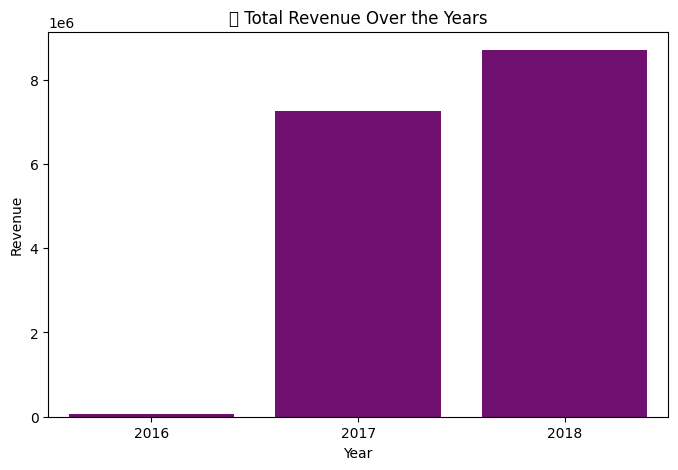

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


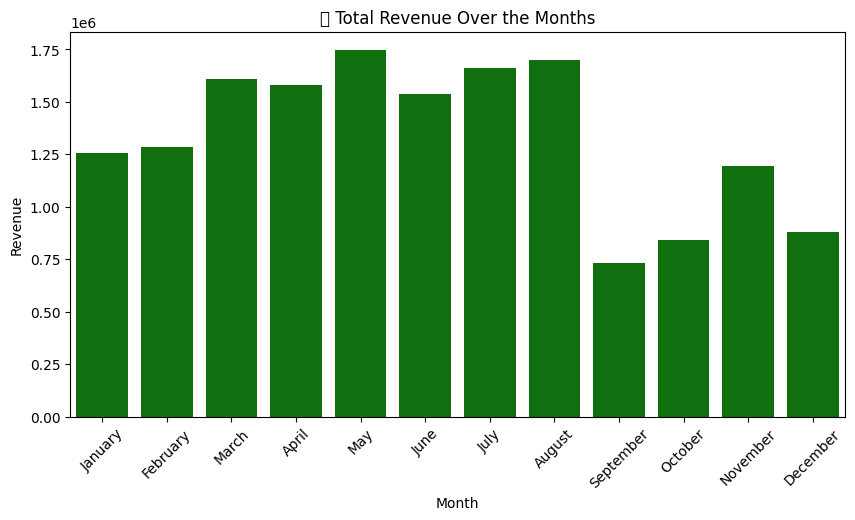

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


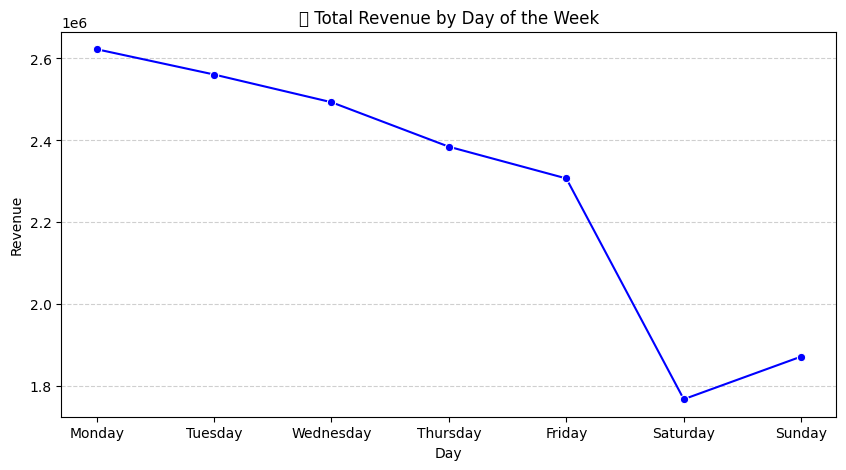

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming orders and payments are already merged in 'df' but we need the timestamp
# If not merged, do this:
# df = payments.merge(orders[['order_id', 'order_purchase_timestamp']], on='order_id', how='left')

# If 'order_purchase_timestamp' is actually in 'orders', use orders directly:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors='coerce')

# Extract date parts
orders['Year'] = orders['order_purchase_timestamp'].dt.year
orders['Month'] = orders['order_purchase_timestamp'].dt.month
orders['Day'] = orders['order_purchase_timestamp'].dt.day
orders['Month_Name'] = orders['order_purchase_timestamp'].dt.strftime('%B')
orders['order_day_name'] = orders['order_purchase_timestamp'].dt.day_name()

# Merge revenue info from payments
orders_with_payments = orders.merge(payments[['order_id', 'payment_value']], on='order_id', how='left')

# Revenue grouped
revenue_yearly = orders_with_payments.groupby("Year")["payment_value"].sum().reset_index()
revenue_monthly = orders_with_payments.groupby("Month_Name")["payment_value"].sum().reset_index()
revenue_daily = orders_with_payments.groupby("Day")["payment_value"].sum().reset_index()
revenue_by_day = orders_with_payments.groupby("order_day_name")["payment_value"].sum()

# Order weekdays correctly
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
revenue_by_day = revenue_by_day.reindex(day_order)

# Order months correctly
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
revenue_monthly["Month_Name"] = pd.Categorical(revenue_monthly["Month_Name"], categories=month_order, ordered=True)
revenue_monthly = revenue_monthly.sort_values("Month_Name")

# Plots
plt.figure(figsize=(8, 5))
sns.barplot(x="Year", y="payment_value", data=revenue_yearly, color="purple")
plt.title("📅 Total Revenue Over the Years")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x="Month_Name", y="payment_value", data=revenue_monthly, color="green")
plt.title("📆 Total Revenue Over the Months")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(x=revenue_by_day.index, y=revenue_by_day.values, marker="o", color="blue")
plt.title("📈 Total Revenue by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()

## Weekday vs Weekend Total Revenue

Weekday Revenue: 12367988.080000002
Weekend Revenue: 3640884.04


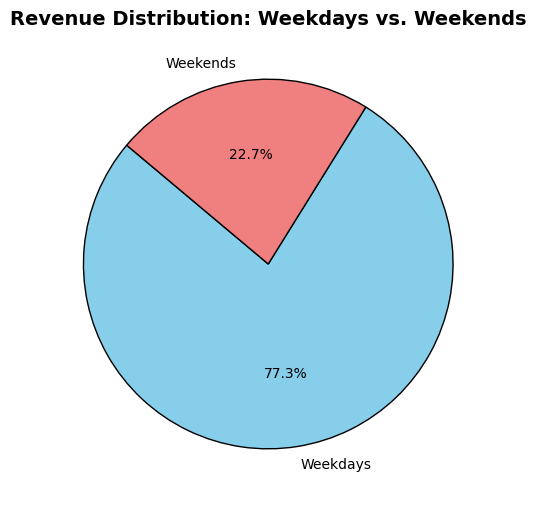

In [48]:
# Define days
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']
all_days = weekdays + weekends

# Make sure all days are present (fill missing with 0)
revenue_by_day = revenue_by_day.reindex(all_days, fill_value=0)

# Sum revenue
weekday_revenue = revenue_by_day.loc[weekdays].sum()
weekend_revenue = revenue_by_day.loc[weekends].sum()

# Debugging print (optional)
print("Weekday Revenue:", weekday_revenue)
print("Weekend Revenue:", weekend_revenue)

# Handle the case where total revenue is zero
if (weekday_revenue + weekend_revenue) == 0:
    print("🚫 Total revenue is zero — cannot create pie chart.")
else:
    # Prepare data
    revenue_data = {'Weekdays': weekday_revenue, 'Weekends': weekend_revenue}

    # Plot
    plt.figure(figsize=(6, 6))
    plt.pie(revenue_data.values(),
            labels=revenue_data.keys(),
            autopct='%1.1f%%',
            colors=['skyblue', 'lightcoral'],
            startangle=140,
            wedgeprops={'edgecolor': 'black'})
    plt.title("Revenue Distribution: Weekdays vs. Weekends", fontsize=14, fontweight='bold')
    plt.show()


## Total Orders Over Time

Available columns in product dataset: ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
Available columns in orders dataset: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
Columns in df_orders: Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Columns in df_products: Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')
Columns after mer

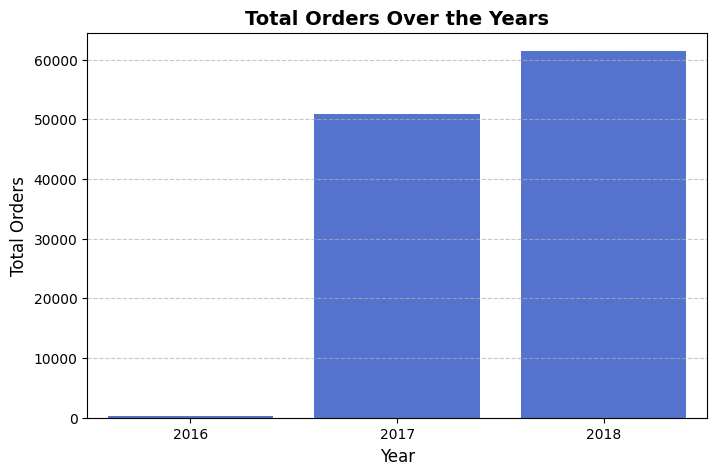

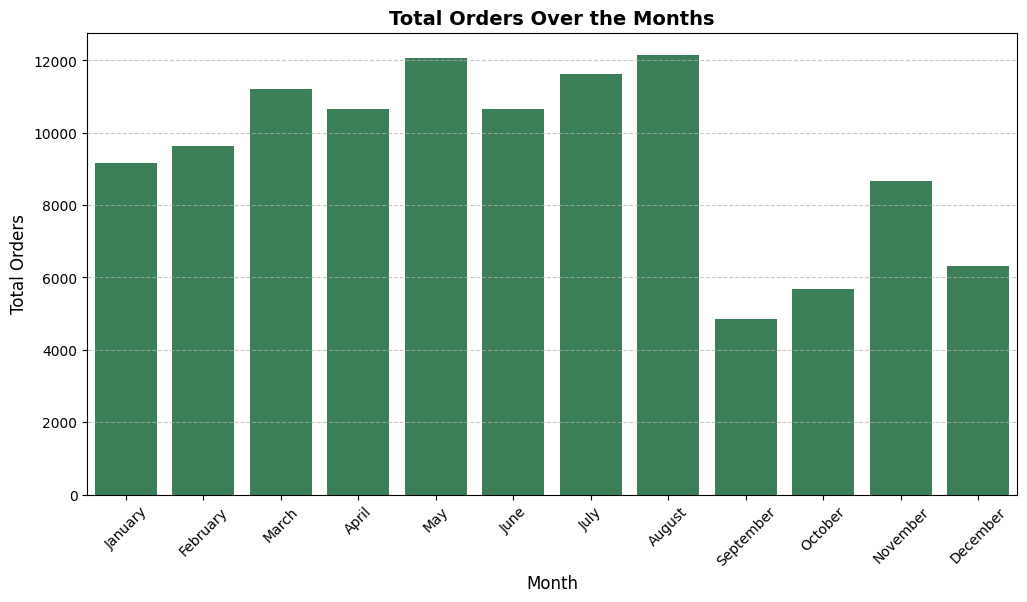

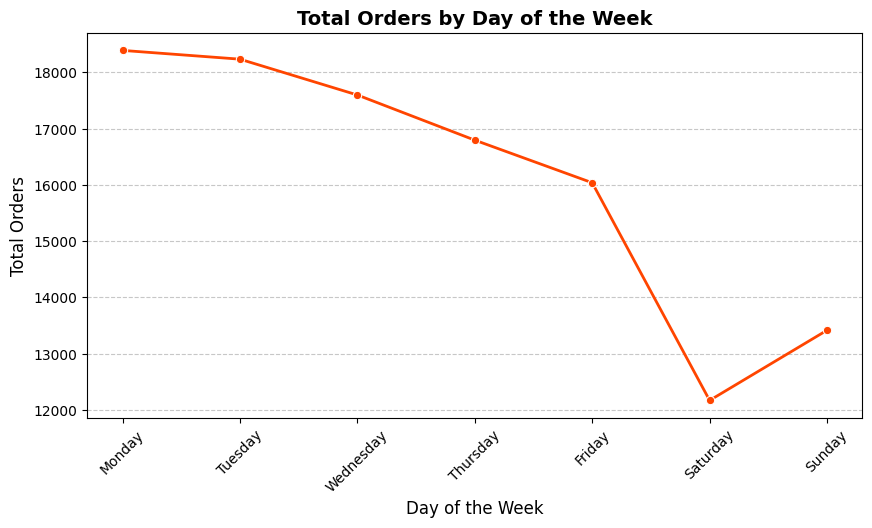

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Load the product and orders data (adjust paths as needed)
# Replace with your actual file path for product data
df_products = pd.read_csv(folder_path + "olist_products_dataset_7.csv")  # Your product data

# Replace with your actual file path for orders data
df_orders = pd.read_csv(folder_path + "olist_orders_dataset_6.csv")      # Your orders data with timestamps

# 📌 Check available columns in both datasets
print("Available columns in product dataset:", df_products.columns.tolist())
print("Available columns in orders dataset:", df_orders.columns.tolist())

# 📌 Merge datasets based on common column 'product_id' or 'order_id' (check which one is common)

# If 'product_id' is indeed the common column, make sure it's present in both DataFrames:
# Check the actual column names in your DataFrames:
print("Columns in df_orders:", df_orders.columns)
print("Columns in df_products:", df_products.columns)

# If the column name is slightly different (e.g., 'product_ID'), adjust the merge:
# df_merged = pd.merge(df_orders, df_products, left_on="order_id", right_on="product_id", how="inner")

# If 'order_id' is the common column to both files and is meant to be used to merge the dataframes:
# df_merged = pd.merge(df_orders, df_products, on="order_id", how="inner") # original line causing error
# Since 'order_id' is not in df_products, we need to first merge it with order_items
df_merged_intermediate = pd.merge(df_orders, order_items, on='order_id', how='inner')
# Now we can merge with df_products using 'product_id' as the common column
df_merged = pd.merge(df_merged_intermediate, df_products, on="product_id", how="inner")

# Check merged dataset
print("Columns after merging:", df_merged.columns.tolist())

# 📌 Ensure the timestamp column exists (order_purchase_timestamp)
timestamp_col = "order_purchase_timestamp"  # Adjust if needed

# 📌 Convert timestamp column to datetime
df_merged[timestamp_col] = pd.to_datetime(df_merged[timestamp_col])

# 📌 Extract Year, Month Name, and Day Name from the timestamp
df_merged["Year"] = df_merged[timestamp_col].dt.year
df_merged["Month_Name"] = df_merged[timestamp_col].dt.strftime('%B')  # Full Month name
df_merged["Day_Name"] = df_merged[timestamp_col].dt.day_name()         # Full Day name

# 📌 Group data by Year, Month, and Day of the Week for analysis

# Total orders per year
orders_yearly = df_merged.groupby("Year")["order_id"].count().reset_index().rename(columns={"order_id": "Total Orders"})

# Total orders per month
orders_monthly = df_merged.groupby("Month_Name")["order_id"].count().reset_index().rename(columns={"order_id": "Total Orders"})

# Total orders per day of the week
orders_weekly = df_merged.groupby("Day_Name")["order_id"].count().reset_index().rename(columns={"order_id": "Total Orders"})

# 📌 Ensure correct month and day order for better visualization
month_order = ["January", "February", "March", "April", "May", "June", "July",
               "August", "September", "October", "November", "December"]
orders_monthly["Month_Name"] = pd.Categorical(orders_monthly["Month_Name"], categories=month_order, ordered=True)
orders_monthly = orders_monthly.sort_values("Month_Name")

# 📌 Ensure correct day order (Monday-Sunday)
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
orders_weekly["Day_Name"] = pd.Categorical(orders_weekly["Day_Name"], categories=day_order, ordered=True)
orders_weekly = orders_weekly.sort_values("Day_Name")

# 📊 Plot Total Orders Over the Years
plt.figure(figsize=(8, 5))
sns.barplot(x="Year", y="Total Orders", data=orders_yearly, color="royalblue")
plt.title("Total Orders Over the Years", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 📊 Plot Total Orders Over the Months
plt.figure(figsize=(12, 6))
sns.barplot(x="Month_Name", y="Total Orders", data=orders_monthly, color="seagreen")
plt.title("Total Orders Over the Months", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 📊 Plot Total Orders by Day of the Week
plt.figure(figsize=(10, 5))
sns.lineplot(x="Day_Name", y="Total Orders", data=orders_weekly, marker="o", color="orangered", linewidth=2)
plt.title("Total Orders by Day of the Week", fontsize=14, fontweight='bold')
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Top 10 Cities by Revenue & Orders

In [ ]:
# Top 10 Cities by Revenue
top_cities_revenue = df.groupby("customer_city")["payment_value"].sum().nlargest(10).reset_index()

# Top 10 Cities by Orders
top_cities_orders = df.groupby("customer_city")["order_id"].count().nlargest(10).reset_index()

# 📊 Plot Top 10 Cities by Revenue
plt.figure(figsize=(12, 5))
sns.barplot(x="payment_value", y="customer_city", data=top_cities_revenue, color="blue")
plt.title("Top 10 Cities by Revenue", fontsize=14, fontweight='bold')
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 📊 Plot Top 10 Cities by Orders
plt.figure(figsize=(12, 5))
sns.barplot(x="order_id", y="customer_city", data=top_cities_orders, color="green")
plt.title("Top 10 Cities by Total Orders", fontsize=14, fontweight='bold')
plt.xlabel("Total Orders", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## Top 10 Product Categories by Revenue & Orders

In [ ]:
# Top 10 Categories by Revenue
top_categories_revenue = df.groupby("product_category_name")["payment_value"].sum().nlargest(10).reset_index()

# Top 10 Categories by Orders
top_categories_orders = df.groupby("product_category_name")["order_id"].count().nlargest(10).reset_index()

# 📊 Plot Top 10 Product Categories by Revenue
plt.figure(figsize=(12, 5))
sns.barplot(x="payment_value", y="product_category_name", data=top_categories_revenue, color="purple")
plt.title("Top 10 Product Categories by Revenue", fontsize=14, fontweight='bold')
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 📊 Plot Top 10 Product Categories by Orders
plt.figure(figsize=(12, 5))
sns.barplot(x="order_id", y="product_category_name", data=top_categories_orders, color="orange")
plt.title("Top 10 Product Categories by Total Orders", fontsize=14, fontweight='bold')
plt.xlabel("Total Orders", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## Top 10 Sellers by Revenue & Orders

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Sellers by Revenue
top_sellers_revenue = df.groupby("seller_id")["payment_value"].sum().nlargest(10).reset_index()

# Top 10 Sellers by Orders
top_sellers_orders = df.groupby("seller_id")["order_id"].count().nlargest(10).reset_index()

# 📊 Column Chart for Top 10 Sellers by Revenue
plt.figure(figsize=(12, 6))
sns.barplot(x="seller_id", y="payment_value", data=top_sellers_revenue, color="blue")
plt.title("Top 10 Sellers by Revenue", fontsize=14, fontweight='bold')
plt.xlabel("Seller ID", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)  # Rotate seller IDs for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 📊 Column Chart for Top 10 Sellers by Orders
plt.figure(figsize=(12, 6))
sns.barplot(x="seller_id", y="order_id", data=top_sellers_orders, color="green")
plt.title("Top 10 Sellers by Orders", fontsize=14, fontweight='bold')
plt.xlabel("Seller ID", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Payment Method Distribution

In [ ]:
# Payment Method Distribution
plt.figure(figsize=(8,5))
payment_method_distribution.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(payment_method_distribution)))
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()


# 2.  Order Processing & Delivery Time Analysis


In [ ]:
# Drop rows with missing delivery or purchase/estimated dates
df = df.dropna(subset=['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date'])

# Convert columns to datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

# Calculate actual shipping duration
df['shipping_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

# Filter out invalid negative shipping durations
df = df[df['shipping_days'] >= 0]

# Recalculate estimated and actual delivery days
df["actual_delivery_days"] = df['shipping_days']
df["estimated_delivery_days"] = (df["order_estimated_delivery_date"] - df["order_purchase_timestamp"]).dt.days

# Compute delivery metrics only if data is available
if df.shape[0] > 0:
    avg_delivery_time = df['shipping_days'].mean()
    on_time_deliveries = df[df['order_delivered_customer_date'] <= df['order_estimated_delivery_date']].shape[0]
    on_time_delivery_rate = (on_time_deliveries / df.shape[0]) * 100
    delayed_deliveries = df[df['order_delivered_customer_date'] > df['order_estimated_delivery_date']].shape[0]

    # Display results
    print(f"📦 Average Delivery Time: {avg_delivery_time:.2f} days")
    print(f"✅ On-Time Delivery Rate: {on_time_delivery_rate:.2f}%")
    print(f"⚠️ Delayed Deliveries Count: {delayed_deliveries}")
else:
    print("🚫 No valid delivery data available after filtering.")


# Correlation b/w processing_time_hours, price, freight_value, payment_value

In [ ]:
import numpy as np

plt.figure(figsize=(10, 6))
corr = df[["processing_time_hours", "price", "freight_value", "payment_value"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap of Order Metrics")
plt.show()


## Distribution of Delivery Time

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df["delivery_time_days"], bins=30, kde=True, color="blue")
plt.title("Distribution of Delivery Time (Days)")
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Count of Orders")
plt.show()


## On-Time Deliveries vs Delayed Deliveries

In [ ]:
labels = ["On-Time Deliveries", "Delayed Deliveries"]
sizes = [on_time_deliveries, delayed_deliveries]
colors = ["green", "red"]

plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("On-Time vs Delayed Deliveries")
plt.show()


## Freight Cost vs Delivery Time

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["freight_value"], y=df["delivery_time_days"], alpha=0.5)
plt.title("Freight Cost vs Delivery Time")
plt.xlabel("Freight Cost")
plt.ylabel("Delivery Time (Days)")
plt.show()


## Delivery Time vs Review Score

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["review_score"], y=df["delivery_time_days"])
plt.title("Delivery Time vs Review Score")
plt.xlabel("Review Score")
plt.ylabel("Delivery Time (Days)")
plt.show()


## Shipping_Days vs Review Score

In [ ]:
shipping_review = df.groupby("shipping_days")["review_score"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=shipping_review["shipping_days"], y=shipping_review["review_score"], marker="o", color="orange")
plt.title("Shipping Days vs Review Score")
plt.xlabel("Shipping Days")
plt.ylabel("Average Review Score")
plt.show()


## Top 10 Fastest Sellers and Top 10 Slowest Sellers

In [ ]:
seller_delivery = df.groupby("seller_id")["actual_delivery_days"].mean().reset_index()
top_fastest_sellers = seller_delivery.nsmallest(10, "actual_delivery_days")
top_slowest_sellers = seller_delivery.nlargest(10, "actual_delivery_days")

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Fastest Sellers
ax[0].barh(top_fastest_sellers["seller_id"], top_fastest_sellers["actual_delivery_days"], color="green")
ax[0].set_title("Top 10 Fastest Sellers")
ax[0].set_xlabel("Avg. Delivery Days")

# Slowest Sellers
ax[1].barh(top_slowest_sellers["seller_id"], top_slowest_sellers["actual_delivery_days"], color="red")
ax[1].set_title("Top 10 Slowest Sellers")
ax[1].set_xlabel("Avg. Delivery Days")

plt.show()


## Delivey Time over Time

## Avg Actual vs Estimated Delivery time over year

In [ ]:
import matplotlib.pyplot as plt

# Extract year from order timestamp
df["order_year"] = df["order_purchase_timestamp"].dt.year

# Group by year and calculate average actual & estimated delivery time
yearly_avg_delivery = df.groupby("order_year").agg(
    avg_actual_delivery=("actual_delivery_days", "mean"),
    avg_estimated_delivery=("estimated_delivery_days", "mean")
).reset_index()

# Plot the Yearly Trend
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg_delivery["order_year"], yearly_avg_delivery["avg_actual_delivery"], marker="o", label="Actual Delivery Time", color="blue")
plt.plot(yearly_avg_delivery["order_year"], yearly_avg_delivery["avg_estimated_delivery"], marker="o", label="Estimated Delivery Time", color="orange")

plt.xlabel("Year")
plt.ylabel("Average Delivery Time (Days)")
plt.title("Average Actual vs Estimated Delivery Time by Year")
plt.legend()
plt.grid(True)

plt.show()


## Avg Actual vs Estimated Delivery time over months

In [ ]:
# Extract the month from the order timestamp
df["order_month"] = df["order_purchase_timestamp"].dt.month

# Group by month and calculate average actual & estimated delivery time
monthly_avg_delivery = df.groupby("order_month").agg(
    avg_actual_delivery=("actual_delivery_days", "mean"),
    avg_estimated_delivery=("estimated_delivery_days", "mean")
).reset_index()

# Plot the Monthly Trend
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_delivery["order_month"], monthly_avg_delivery["avg_actual_delivery"], marker="o", label="Actual Delivery Time", color="blue")
plt.plot(monthly_avg_delivery["order_month"], monthly_avg_delivery["avg_estimated_delivery"], marker="o", label="Estimated Delivery Time", color="orange")

# Formatting the Plot
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Month")
plt.ylabel("Average Delivery Time (Days)")
plt.title("Average Actual vs Estimated Delivery Time by Month")
plt.legend()
plt.grid(True)

plt.show()


## Avg Actual vs Estimated Delivery Time Over Days

In [ ]:
# Extract day from order timestamp
df["order_day"] = df["order_purchase_timestamp"].dt.day

# Group by day and calculate average actual & estimated delivery time
daily_avg_delivery = df.groupby("order_day").agg(
    avg_actual_delivery=("actual_delivery_days", "mean"),
    avg_estimated_delivery=("estimated_delivery_days", "mean")
).reset_index()

# Plot the Daily Trend
plt.figure(figsize=(10, 5))
plt.plot(daily_avg_delivery["order_day"], daily_avg_delivery["avg_actual_delivery"], marker="o", label="Actual Delivery Time", color="blue")
plt.plot(daily_avg_delivery["order_day"], daily_avg_delivery["avg_estimated_delivery"], marker="o", label="Estimated Delivery Time", color="orange")

plt.xticks(range(1, 32))  # Days 1 to 31
plt.xlabel("Day of the Month")
plt.ylabel("Average Delivery Time (Days)")
plt.title("Average Actual vs Estimated Delivery Time by Day")
plt.legend()
plt.grid(True)

plt.show()


## Top 10 Cities: Processing Time vs Actual & Estimated Delivery Time

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert timestamps to datetime format
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])
df["order_estimated_delivery_date"] = pd.to_datetime(df["order_estimated_delivery_date"])

# Compute time metrics
df["processing_time_days"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.total_seconds() / (3600 * 24)
df["actual_delivery_days"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days
df["estimated_delivery_days"] = (df["order_estimated_delivery_date"] - df["order_purchase_timestamp"]).dt.days

# Group and filter top 10 cities
city_data = df.groupby("customer_city").agg(
    avg_processing_time=("processing_time_days", "mean"),
    avg_actual_delivery_days=("actual_delivery_days", "mean"),
    avg_estimated_delivery_days=("estimated_delivery_days", "mean")
).reset_index()

top_10_cities = df["customer_city"].value_counts().index[:10]
filtered_city_data = city_data[city_data["customer_city"].isin(top_10_cities)]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_city_data["customer_city"], filtered_city_data["avg_processing_time"], marker="o", linestyle="-", label="Avg Processing Time (Days)", color='b')
plt.plot(filtered_city_data["customer_city"], filtered_city_data["avg_actual_delivery_days"], marker="s", linestyle="--", label="Avg Actual Delivery Time (Days)", color='g')
plt.plot(filtered_city_data["customer_city"], filtered_city_data["avg_estimated_delivery_days"], marker="^", linestyle=":", label="Avg Estimated Delivery Time (Days)", color='r')

plt.xlabel("Top 10 Cities")
plt.ylabel("Days")
plt.title("Top 10 Cities - Processing vs Delivery Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


## Bottom 10 Cities - Processing vs Delivery Time

In [ ]:
# Get bottom 10 cities
bottom_10_cities = df["customer_city"].value_counts().index[-10:]
filtered_city_data = city_data[city_data["customer_city"].isin(bottom_10_cities)]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_city_data["customer_city"], filtered_city_data["avg_processing_time"], marker="o", linestyle="-", label="Avg Processing Time (Days)", color='b')
plt.plot(filtered_city_data["customer_city"], filtered_city_data["avg_actual_delivery_days"], marker="s", linestyle="--", label="Avg Actual Delivery Time (Days)", color='g')
plt.plot(filtered_city_data["customer_city"], filtered_city_data["avg_estimated_delivery_days"], marker="^", linestyle=":", label="Avg Estimated Delivery Time (Days)", color='r')

plt.xlabel("Bottom 10 Cities")
plt.ylabel("Days")
plt.title("Bottom 10 Cities - Processing vs Delivery Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


## Top 10 States - Processing vs Delivery Time

In [ ]:
# Group and filter top 10 states
state_data = df.groupby("customer_state").agg(
    avg_processing_time=("processing_time_days", "mean"),
    avg_actual_delivery_days=("actual_delivery_days", "mean"),
    avg_estimated_delivery_days=("estimated_delivery_days", "mean")
).reset_index()

top_10_states = df["customer_state"].value_counts().index[:10]
filtered_state_data = state_data[state_data["customer_state"].isin(top_10_states)]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_state_data["customer_state"], filtered_state_data["avg_processing_time"], marker="o", linestyle="-", label="Avg Processing Time (Days)", color='b')
plt.plot(filtered_state_data["customer_state"], filtered_state_data["avg_actual_delivery_days"], marker="s", linestyle="--", label="Avg Actual Delivery Time (Days)", color='g')
plt.plot(filtered_state_data["customer_state"], filtered_state_data["avg_estimated_delivery_days"], marker="^", linestyle=":", label="Avg Estimated Delivery Time (Days)", color='r')

plt.xlabel("Top 10 States")
plt.ylabel("Days")
plt.title("Top 10 States - Processing vs Delivery Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


## Bottom 10 States - Processing vs Delivery Time

In [ ]:
# Get bottom 10 states
bottom_10_states = df["customer_state"].value_counts().index[-10:]
filtered_state_data = state_data[state_data["customer_state"].isin(bottom_10_states)]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_state_data["customer_state"], filtered_state_data["avg_processing_time"], marker="o", linestyle="-", label="Avg Processing Time (Days)", color='b')
plt.plot(filtered_state_data["customer_state"], filtered_state_data["avg_actual_delivery_days"], marker="s", linestyle="--", label="Avg Actual Delivery Time (Days)", color='g')
plt.plot(filtered_state_data["customer_state"], filtered_state_data["avg_estimated_delivery_days"], marker="^", linestyle=":", label="Avg Estimated Delivery Time (Days)", color='r')

plt.xlabel("Bottom 10 States")
plt.ylabel("Days")
plt.title("Bottom 10 States - Processing vs Delivery Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


## Top 10 Categories - Processing vs Delivery Time

In [ ]:
# Group and filter top 10 categories
category_data = df.groupby("product_category_name").agg(
    avg_processing_time=("processing_time_days", "mean"),
    avg_actual_delivery_days=("actual_delivery_days", "mean"),
    avg_estimated_delivery_days=("estimated_delivery_days", "mean")
).reset_index()

top_10_categories = df["product_category_name"].value_counts().index[:10]
filtered_category_data = category_data[category_data["product_category_name"].isin(top_10_categories)]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_category_data["product_category_name"], filtered_category_data["avg_processing_time"], marker="o", linestyle="-", label="Avg Processing Time (Days)", color='b')
plt.plot(filtered_category_data["product_category_name"], filtered_category_data["avg_actual_delivery_days"], marker="s", linestyle="--", label="Avg Actual Delivery Time (Days)", color='g')
plt.plot(filtered_category_data["product_category_name"], filtered_category_data["avg_estimated_delivery_days"], marker="^", linestyle=":", label="Avg Estimated Delivery Time (Days)", color='r')

plt.xlabel("Top 10 Categories")
plt.ylabel("Days")
plt.title("Top 10 Categories - Processing vs Delivery Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


## Bottom 10 Categories - Processing vs Delivery Time

In [ ]:
# Get bottom 10 categories
bottom_10_categories = df["product_category_name"].value_counts().index[-10:]
filtered_category_data = category_data[category_data["product_category_name"].isin(bottom_10_categories)]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_category_data["product_category_name"], filtered_category_data["avg_processing_time"], marker="o", linestyle="-", label="Avg Processing Time (Days)", color='b')
plt.plot(filtered_category_data["product_category_name"], filtered_category_data["avg_actual_delivery_days"], marker="s", linestyle="--", label="Avg Actual Delivery Time (Days)", color='g')
plt.plot(filtered_category_data["product_category_name"], filtered_category_data["avg_estimated_delivery_days"], marker="^", linestyle=":", label="Avg Estimated Delivery Time (Days)", color='r')

plt.xlabel("Bottom 10 Categories")
plt.ylabel("Days")
plt.title("Bottom 10 Categories - Processing vs Delivery Time")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


# 📊 3. Customer Churn &Behavioural  Analysis

In [ ]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

# Total Customers
total_customers = df['customer_unique_id'].nunique()

# New vs. Returning Customers
returning_customers = df[df.duplicated(subset=['customer_unique_id'], keep=False)]['customer_unique_id'].nunique()
new_customers = total_customers - returning_customers
returning_customer_rate = (returning_customers / total_customers) * 100

# Average Orders per Customer
average_orders_per_customer = df.groupby('customer_unique_id')['order_id'].count().mean()

# Customer Lifetime Value (CLV)
clv = df.groupby('customer_unique_id')['payment_value'].sum().mean()

# Churn Rate (Customers with no orders in last 6 months)
six_months_ago = df['order_purchase_timestamp'].max() - pd.DateOffset(months=6)
churned_customers = df[df['order_purchase_timestamp'] < six_months_ago]['customer_unique_id'].nunique()
churn_rate = (churned_customers / total_customers) * 100

# Average Order Value (AOV)
average_order_value = df['payment_value'].mean()

# Top 10 Customers by Revenue
top_customers = df.groupby('customer_unique_id')['payment_value'].sum().nlargest(10)

# Order Frequency by Customer
order_frequency = df.groupby('customer_unique_id')['order_id'].count()

# Revenue by Customer Location
revenue_by_location = df.groupby('customer_city')['payment_value'].sum()
# 1. Customer Retention Rate
active_customers = df[df['order_purchase_timestamp'] >= six_months_ago]['customer_unique_id'].nunique()
customer_retention_rate = (active_customers / total_customers) * 100

# 2. Average Processing Time (Time from order to delivery)
df['processing_time_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
average_processing_time = df['processing_time_days'].mean()

# 3. On-Time Delivery Rate (Orders delivered before estimated date)
on_time_deliveries = df[df['order_delivered_customer_date'] <= df['order_estimated_delivery_date']].shape[0]
on_time_delivery_rate = (on_time_deliveries / df.shape[0]) * 100

# 4. Late Deliveries
late_deliveries = df[df['order_delivered_customer_date'] > df['order_estimated_delivery_date']].shape[0]

# 5. Average Review Score per Customer
avg_review_score = df.groupby('customer_unique_id')['review_score'].mean().mean()

# 6. Payment Method Distribution
payment_method_counts = df['payment_type'].value_counts()

# 7. Revenue per Customer
revenue_per_customer = df.groupby('customer_unique_id')['payment_value'].sum()



## New vs. Returning Customers

In [ ]:
labels = ['New Customers', 'Returning Customers']
sizes = [new_customers, returning_customers]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("New vs Returning Customers")
plt.show()


## Customer Retention vs Churn Rate

In [ ]:
labels = ['Active Customers', 'Churned Customers']
sizes = [active_customers, churned_customers]
colors = ['lightgreen', 'red']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Customer Retention vs Churn Rate")
plt.show()


## Top 10 Most Loyal Customers

In [ ]:
loyal_customers = df.groupby('customer_unique_id')['order_id'].count().nlargest(10)

plt.figure(figsize=(10,5))
loyal_customers.sort_values().plot(kind='barh', color='gold')
plt.xlabel("Number of Orders")
plt.ylabel("Customer ID")
plt.title("Top 10 Most Loyal Customers")
plt.show()


## Monthly Active Customers

In [ ]:
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')
monthly_active_customers = df.groupby('order_month')['customer_unique_id'].nunique()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_active_customers.index.astype(str), y=monthly_active_customers.values, marker="o", color="b")
plt.xticks(rotation=45)
plt.title("Monthly Active Customers")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.show()


## Top 10 Customers by Revenue

In [ ]:
plt.figure(figsize=(10,5))
top_customers.sort_values().plot(kind='barh', color='green')
plt.xlabel("Total Revenue")
plt.ylabel("Customer ID")
plt.title("Top 10 Customers by Revenue")
plt.show()


## Top 10 Revenue Generating Locations

In [ ]:
top_locations = revenue_by_location.nlargest(10)

plt.figure(figsize=(12,6))
top_locations.sort_values().plot(kind='bar', color='purple')
plt.ylabel("Total Revenue")
plt.xlabel("Customer City")
plt.title("Top 10 Revenue Generating Locations")
plt.xticks(rotation=45)
plt.show()


## Customer Churn Analysis

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=['Active', 'Churned'], y=[total_customers - churned_customers, churned_customers], color='green')
plt.ylabel("Number of Customers")
plt.title("Customer Churn Analysis")
plt.show()


# 1️⃣ Customer Analysis KPIs

In [ ]:
# Total Customers
total_customers = df['customer_unique_id'].nunique()

# Repeat Customers (Customers with more than 1 order)
repeat_customers = df[df.duplicated(subset=['customer_unique_id'], keep=False)]['customer_unique_id'].nunique()

# Customer Retention Rate
customer_retention_rate = (repeat_customers / total_customers) * 100

# New Customers (Customers with only 1 order)
new_customers = total_customers - repeat_customers

# Churn Rate (Customers who did not reorder)
customer_churn_rate = (new_customers / total_customers) * 100

# Average Orders per Customer
avg_orders_per_customer = df.groupby('customer_unique_id')['order_id'].count().mean()

# Top 10 Cities by Customer Count
top_cities = df['customer_city'].value_counts().head(10)

# Top 10 States by Customer Count
top_states = df['customer_state'].value_counts().head(10)



# 2️⃣ Churn Analysis KPIs

In [ ]:
# Orders per Customer
customer_order_counts = df.groupby('customer_unique_id')['order_id'].count()

# Churned Customers (Only 1 order)
churned_customers = customer_order_counts[customer_order_counts == 1].count()

# Active Customers (More than 1 order)
active_customers = customer_order_counts[customer_order_counts > 1].count()

# Churn Rate
churn_rate = (churned_customers / total_customers) * 100


## Customer Distribution by Day of the Week

In [ ]:
# Convert order timestamp to datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Extract day name
df['order_day_name'] = df['order_purchase_timestamp'].dt.day_name()

# Group by day of the week
customers_per_day = df.groupby('order_day_name')['customer_unique_id'].nunique().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=customers_per_day.index, y=customers_per_day.values,  color="Green")
plt.title("Customer Distribution by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Customers")
plt.show()


## Customer Distribution by Month

In [ ]:
# Extract month names
df['order_month_name'] = df['order_purchase_timestamp'].dt.month_name()

# Group by month
customers_per_month = df.groupby('order_month_name')['customer_unique_id'].nunique().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=customers_per_month.index, y=customers_per_month.values, color="Blue")
plt.title("Customer Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


## Customer Distribution by Year

In [ ]:
# Extract year
df['order_year'] = df['order_purchase_timestamp'].dt.year

# Filter only years 2016, 2017, 2018
customers_per_year = df[df['order_year'].isin([2016, 2017, 2018])].groupby('order_year')['customer_unique_id'].nunique()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=customers_per_year.index.astype(str), y=customers_per_year.values, color="red")
plt.title("Customer Distribution by Year")
plt.xlabel("Year")
plt.ylabel("Number of Customers")
plt.show()


In [ ]:
# Get total unique customers
total_customers = df['customer_unique_id'].nunique()

# Get top 5 cities by order count
top_cities = df['customer_city'].value_counts().head(5)

# Define custom colors
colors = ['royalblue', 'darkorange', 'seagreen', 'crimson', 'purple']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=top_cities.index, y=top_cities.values, zorder=2)

# Apply colors manually
for i, bar in enumerate(plt.gca().containers[0]):
    bar.set_color(colors[i])

plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.title('Top 5 Cities by Order Count')
plt.xticks(rotation=45)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

plt.show()

## Top 10 Cities by Customer Count

In [ ]:
plt.figure(figsize=(10,5))
top_cities.sort_values().plot(kind='barh', color='teal')
plt.xlabel("Number of Customers")
plt.ylabel("City")
plt.title("Top 10 Cities by Customer Count")
plt.show()


## Top 10 States by Customer Count

In [ ]:
plt.figure(figsize=(10,5))
top_states.sort_values().plot(kind='barh', color='purple')
plt.xlabel("Number of Customers")
plt.ylabel("State")
plt.title("Top 10 States by Customer Count")
plt.show()


## Top 5 Cities by Order Count

In [ ]:
total_customers = df['customer_unique_id'].nunique()
top_cities = df['customer_city'].value_counts().head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_cities.index, y=top_cities.values, color="royalblue")
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.title('Top 5 Cities by Order Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Total Customers
total_customers = df['customer_id'].nunique()

# Customer Distribution by State
customer_state_distribution = df['customer_state'].value_counts()

# Repeat vs. New Customers
repeat_customers = df['customer_id'].value_counts().gt(1).sum()
new_customers = total_customers - repeat_customers

# Top Cities by Total Revenue
top_cities_revenue = df.groupby("customer_city")["payment_value"].sum().sort_values(ascending=False).head(10)


## Customer Distribution by State

In [ ]:
# Customer Distribution by State
plt.figure(figsize=(10,5))
customer_state_distribution.plot(kind='bar', color='purple')
plt.title("Customer Distribution by State")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## Top 10 Cities by Total Revenue

In [ ]:
# Top 10 Cities by Total Revenue
plt.figure(figsize=(10,5))
top_cities_revenue.plot(kind='bar', color='orange')
plt.title("Top 10 Cities by Total Revenue")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


# 📊 4. Review Analysis

## Review Score Distribution

In [ ]:
review_distribution = df['review_score'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(review_distribution, labels=review_distribution.index, autopct='%1.1f%%', colors=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Review Score Distribution')
plt.show()

## Top 10 Products with Most 5-Star Ratings


In [ ]:
import matplotlib.pyplot as plt

# Filter products with only 5-star ratings
top_5star_products = df[df['review_score'] == 5]

# Count the number of 5-star reviews for each product name
top_10_products = top_5star_products['product_category_name'].value_counts().head(10)

# Plot the top 10 products with the most 5-star reviews
plt.figure(figsize=(12, 6))
plt.bar(top_10_products.index, top_10_products.values,
        color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'brown', 'pink', 'gray', 'yellow'])

plt.xlabel('Product Name')
plt.ylabel('Number of 5-Star Reviews')
plt.title('Top 10 Products with Most 5-Star Ratings')
plt.xticks(rotation=45)
plt.show()


## Bottom 10 Products with Least Number of Low Ratings

In [ ]:
import matplotlib.pyplot as plt

# Filter products with 1-star, 2-star, or 3-star ratings
low_rated_products = df[df['review_score'].isin([1, 2, 3])]

# Count the number of low ratings for each product name
bottom_10_products = low_rated_products['product_category_name'].value_counts().tail(10)

# Plot the bottom 10 products with the least number of low ratings
plt.figure(figsize=(12, 6))
plt.bar(bottom_10_products.index, bottom_10_products.values,
        color=['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'brown', 'pink', 'gray', 'yellow'])

plt.xlabel('Product Name')
plt.ylabel('Number of Low Ratings (1-3 Stars)')
plt.title('Bottom 10 Products with Least Number of Low Ratings')
plt.xticks(rotation=45)
plt.show()


## Positive vs Negative Reviews

In [ ]:
# Classify Reviews
df['review_category'] = df['review_score'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')

# Count
review_sentiment = df['review_category'].value_counts()

# Colors
colors = ['green', 'red']

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(review_sentiment, labels=review_sentiment.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Positive vs Negative Reviews")

plt.show()


## Average Review Score by Day

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'], errors='coerce')

# Group by day name
daily_avg = df.groupby(df['review_creation_date'].dt.day_name())['review_score'].mean()

# Reorder days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg = daily_avg.reindex(days_order)

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(daily_avg.index, daily_avg.values, color=['blue', 'green', 'orange', 'red', 'purple', 'brown', 'cyan'])

plt.xlabel("Day of the Week")
plt.ylabel("Avg Review Score")
plt.title("Average Review Score by Day")
plt.xticks(rotation=45)

plt.show()


## Average Review Score by Year

In [ ]:
# Convert to datetime
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'], errors='coerce')

# Group by year
yearly_avg = df.groupby(df['review_creation_date'].dt.year)['review_score'].mean()

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(yearly_avg.index.astype(str), yearly_avg.values, color=['teal', 'magenta', 'indigo'])

plt.xlabel("Year")
plt.ylabel("Avg Review Score")
plt.title("Average Review Score by Year")

plt.show()


### KPI'S

In [ ]:
avg_review_score = df['review_score'].mean()
review_distribution = df['review_score'].value_counts().sort_index()
five_star_percentage = (review_distribution[5] / review_distribution.sum()) * 100
review_completion_rate = df['review_comment_message'].notna().mean() * 100


In [ ]:
# Total Reviews
total_reviews = df['review_id'].nunique()

# Average Review Score
avg_review_score = df['review_score'].mean()

# Most Common Review Titles
common_review_titles = df['review_comment_title'].value_counts().head(10)

# Review Comment Length Distribution
df['review_comment_length'] = df['review_comment_message'].str.len()
avg_review_comment_length = df['review_comment_length'].mean()

# Positive vs Negative Reviews (Assume score >= 4 as positive)
positive_reviews = df[df['review_score'] >= 4].shape[0]
negative_reviews = df[df['review_score'] < 4].shape[0]


## Average Review Score by Month

In [ ]:
# 5️⃣ Average Review Score for Each Month
monthly_avg_review = df.groupby('order_month')['review_score'].mean()

plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_review.index, monthly_avg_review, marker='o', linestyle='-', color='magenta', label='Avg Review Score')
plt.title("Average Review Score by Month", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Average Review Score")
plt.grid(True)
plt.legend()
plt.show()

## Most Common Review Titles

In [ ]:
# Most Common Review Titles
plt.figure(figsize=(10,5))
common_review_titles.plot(kind='bar', color='yellow')
plt.title("Most Common Review Titles")
plt.xlabel("Review Title")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## Distribution of Review Comment Length

In [ ]:
# Review Comment Length Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['review_comment_length'], bins=30, kde=True, color="green")
plt.title("Distribution of Review Comment Length")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()


## Positive vs Negative Reviews

In [ ]:
# Positive vs Negative Reviews
plt.figure(figsize=(8,5))
plt.bar(["Positive Reviews", "Negative Reviews"], [positive_reviews, negative_reviews], color=["lightgreen", "red"])
plt.title("Positive vs Negative Reviews", fontsize=14)
plt.ylabel("Count")
plt.show()


##  Scatter plot Plot: Sales Distribution by Review Score

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by product and calculate average review score and total sales (assuming price * number of sales)
sales_review_data = df.groupby('product_category_name').agg({'review_score': 'mean', 'price': 'sum'}).reset_index()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sales_review_data['review_score'], y=sales_review_data['price'], alpha=0.7, edgecolor='black')

plt.xlabel('Average Review Score')
plt.ylabel('Total Sales (Revenue)')
plt.title('Review Score vs. Sales')
plt.grid(True)
plt.show()


##  Box Plot: Sales Distribution by Review Score

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming sales data = price * order count
df['sales'] = df['price'] * df['order_item_id']

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['review_score'], y=df['sales'])

plt.xlabel('Review Score')
plt.ylabel('Total Sales')
plt.title('Distribution of Sales Across Review Scores')
plt.grid(True)
plt.show()


In [ ]:


# Filter orders with 5-star reviews
five_star_orders = df[df["review_score"] == 5]

# Count payment type distribution
payment_distribution = five_star_orders["payment_type"].value_counts()

# Print the distribution
print(payment_distribution)

# Plot the distribution
plt.figure(figsize=(8, 5))
payment_distribution.plot(kind="bar", color=["skyblue", "orange", "green", "red"])
plt.xlabel("Payment Type")
plt.ylabel("Number of Orders")
plt.title("Payment Type Distribution for 5-Star Review Orders")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
df["shipping_days"] = (pd.to_datetime(df["order_delivered_customer_date"]) - pd.to_datetime(df["order_purchase_timestamp"])).dt.days

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["shipping_days"], y=df["review_score"], alpha=0.5, color="blue")

# Optional: Add trend line
sns.regplot(x=df["shipping_days"], y=df["review_score"], scatter=False, color="red")

# Labels & Title
plt.xlabel("Shipping Days")
plt.ylabel("Customer Feedback (Review Score)")
plt.title("Customer Feedback vs. Shipping Days")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()